#### Calculate COVID-19 data trends for the last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

In [41]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [42]:
COVID_Data = pd.read_csv("..\\..\\Data\\US_Covid_19_Dataset.csv",parse_dates=['ReportDate'], index_col = "ReportDate")
COVID_Data['Population']=COVID_Data['Population'].astype('Int64')
COVID_Data

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2020-01-22,1,AL,0,Statewide Unallocated,0,0,0
2020-01-22,1,AL,1001,Autauga County,0,0,55869
2020-01-22,1,AL,1003,Baldwin County,0,0,223234
2020-01-22,1,AL,1005,Barbour County,0,0,24686
2020-01-22,1,AL,1007,Bibb County,0,0,22394
...,...,...,...,...,...,...,...
2022-02-10,56,WY,56037,Sweetwater County,10685,119,42343
2022-02-10,56,WY,56039,Teton County,9502,15,23464
2022-02-10,56,WY,56041,Uinta County,5539,36,20226


In [43]:
COVID_Data.sort_values(by='ReportDate', ascending=False)

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2022-02-10,56,WY,56045,Weston County,1514,17,6927
2022-02-10,21,KY,21123,LaRue County,3532,64,<NA>
2022-02-10,21,KY,21119,Knott County,3628,53,14806
2022-02-10,21,KY,21117,Kenton County,39691,356,166998
2022-02-10,21,KY,21115,Johnson County,5536,86,22188
...,...,...,...,...,...,...,...
2020-01-22,39,OH,39097,Madison County,0,0,44731
2020-01-22,39,OH,39095,Lucas County,0,0,428348
2020-01-22,39,OH,39093,Lorain County,0,0,309833


In [45]:
date_list = ['2/3/2022', '2/10/2022']
date_list = pd.to_datetime(date_list)
date_list

mask = (COVID_Data.index >= date_list[0]) & (COVID_Data.index <= date_list[1])
covid_last_week=COVID_Data.loc[mask]
mask = covid_last_week['State'] == 'TX'
covid_last_week=covid_last_week.loc[mask]
covid_last_week

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2022-02-03,48,TX,0,Statewide Unallocated,69374,18,0
2022-02-03,48,TX,48001,Anderson County,9334,220,57735
2022-02-03,48,TX,48003,Andrews County,3747,69,18705
2022-02-03,48,TX,48005,Angelina County,14945,446,86715
2022-02-03,48,TX,48007,Aransas County,3719,71,23510
...,...,...,...,...,...,...,...
2022-02-10,48,TX,48499,Wood County,7839,262,45539
2022-02-10,48,TX,48501,Yoakum County,1031,38,8713
2022-02-10,48,TX,48503,Young County,3767,82,18010


In [46]:
df = covid_last_week.copy()
df = df[['ConfirmCasesCount', 'DeathCount']]
df = df.reset_index()

Confirmed_Death_by_Date = df[['ConfirmCasesCount', 'DeathCount']].groupby(df['ReportDate']).sum()  #sum of cases grouped by date
Confirmed_Death_by_Date

,ConfirmCasesCount,DeathCount
ReportDate,,
2022-02-03,6308728,79135
2022-02-04,6330497,79429
2022-02-05,6351228,79710
2022-02-06,6369286,80003
2022-02-07,6383581,80309
2022-02-08,6395334,80310
2022-02-09,6407921,80310
2022-02-10,6423519,80310


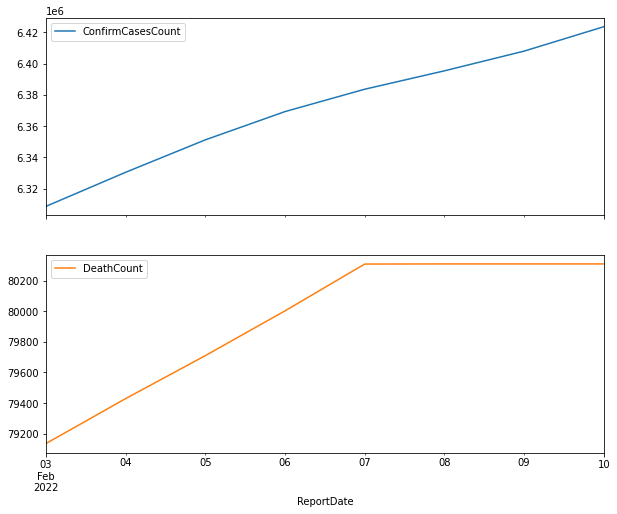

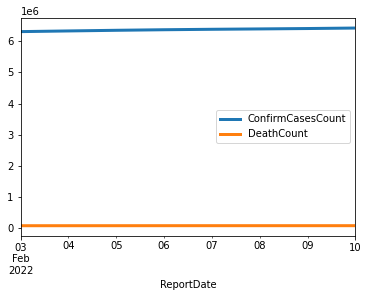

In [47]:
Confirmed_Death_by_Date.plot(subplots=True, figsize=(10,8), label='actual')
Confirmed_Death_by_Date.plot(label='cases count', lw=3)
plt.legend()

C:\Users\balam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


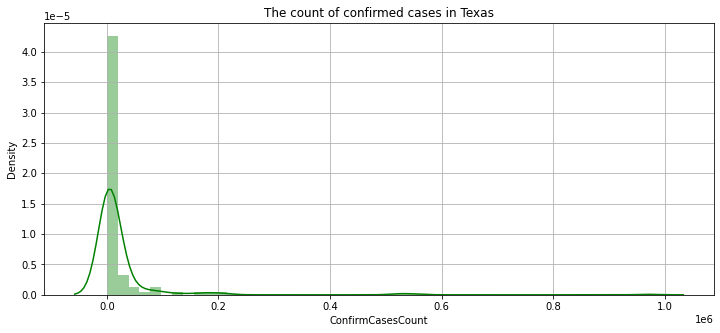

In [48]:
# Count of confirmed cases in Texas 
plt.figure(figsize=(12,5))
plt.title("The count of confirmed cases in Texas")
ax = sns.distplot(covid_last_week["ConfirmCasesCount"], color = 'g')
plt.grid()

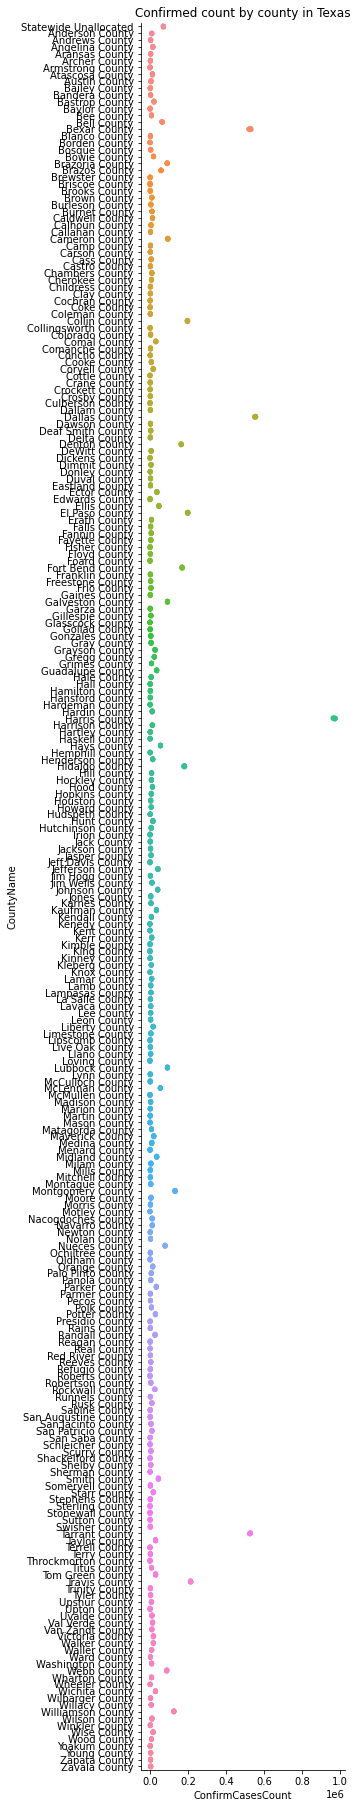

In [49]:
#Confirmed count by county in Texas
g = sns.catplot(y = 'CountyName', x = 'ConfirmCasesCount', data = covid_last_week,
                   height = 25, aspect = 0.2)
plt.title("Confirmed count by county in Texas")
plt.show()

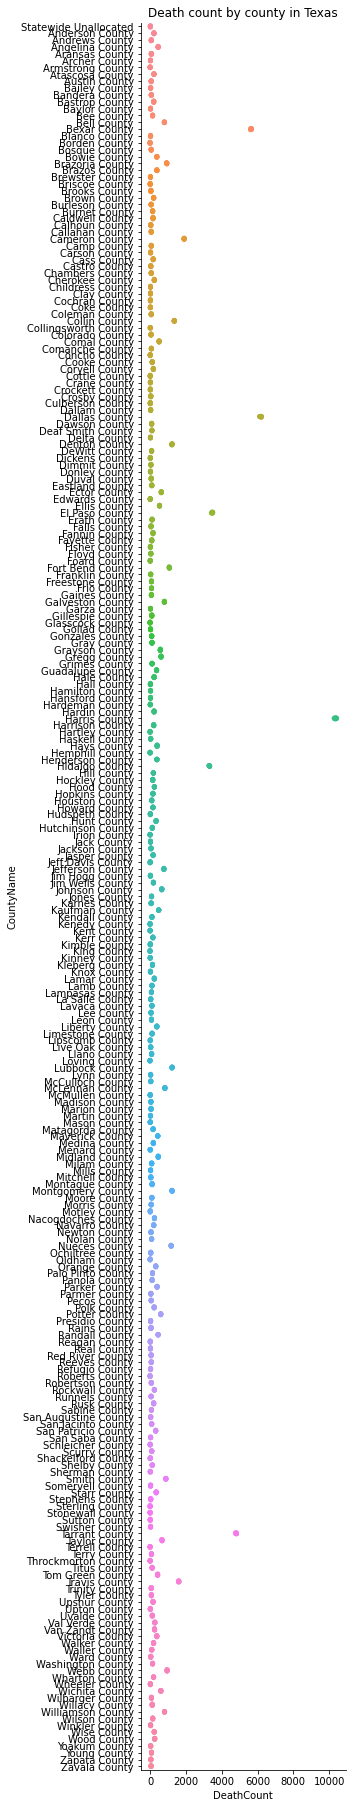

In [50]:
#Count of deaths by county in Texas
g = sns.catplot(y = 'CountyName', x = 'DeathCount', data = covid_last_week,
                   height = 25, aspect = 0.2)
plt.title("Death count by county in Texas")
plt.show()

In [51]:
covid_last_week.sort_values(by='ConfirmCasesCount', ascending=False).head(5)

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2022-02-10,48,TX,48201,Harris County,975762,10395,4713325
2022-02-09,48,TX,48201,Harris County,974122,10395,4713325
2022-02-08,48,TX,48201,Harris County,972350,10395,4713325
2022-02-07,48,TX,48201,Harris County,971087,10395,4713325
2022-02-06,48,TX,48201,Harris County,969146,10358,4713325


In [52]:
covid_last_week.sort_values(by='DeathCount', ascending=False).head(5)

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2022-02-10,48,TX,48201,Harris County,975762,10395,4713325
2022-02-07,48,TX,48201,Harris County,971087,10395,4713325
2022-02-09,48,TX,48201,Harris County,974122,10395,4713325
2022-02-08,48,TX,48201,Harris County,972350,10395,4713325
2022-02-06,48,TX,48201,Harris County,969146,10358,4713325


Based on the visualizations, we can see that the confirmed covid cases and deaths due to covid were increasing steadily in Texas in the week of '8/9/2021'. Additionally, Harris County had the most number of confirmed covid cases of 451746 people and the most number of deaths of 6842 people due to covid in this period. 

#### Each student member creates notebooks to read the Enrichment data and displays them in a notebook.

In [53]:
COVID_Data.head()

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,
2020-01-22,1,AL,0,Statewide Unallocated,0,0,0
2020-01-22,1,AL,1001,Autauga County,0,0,55869
2020-01-22,1,AL,1003,Baldwin County,0,0,223234
2020-01-22,1,AL,1005,Barbour County,0,0,24686
2020-01-22,1,AL,1007,Bibb County,0,0,22394


In [54]:
president_county = pd.read_csv("..\\..\\Data\\Presidential_Election Results_Political leanings.csv")
president_county

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [55]:
#Mapping the state name with its abbreviation. This will be helpful later when we perform merging with the super COVID-19 dataset.
state_mappings = {
'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR',
'California' : 'CA', 'Colorado' : 'CO', 'Connecticut': 'CT',
'Delaware' : 'DE', 'District of Columbia' : 'DC', 
'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI',
'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA',
'Kansas' : 'KS', 'Kentucky' : 'KY','Louisiana' : 'LA',
'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT',
'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico': 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND',
'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR',
'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD',
'Tennessee' : 'TN', 'Texas' : 'TX',
'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA',
'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'
}
state_mappings

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming

In [56]:
#Overriding current state values with the correlating abbreviation.
president_county['state'] = president_county['state'].map(state_mappings)
president_county

,state,county,candidate,party,total_votes,won
0,DE,Kent County,Joe Biden,DEM,44552,True
1,DE,Kent County,Donald Trump,REP,41009,False
2,DE,Kent County,Jo Jorgensen,LIB,1044,False
3,DE,Kent County,Howie Hawkins,GRN,420,False
4,DE,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,AZ,Maricopa County,Write-ins,WRI,1331,False
32173,AZ,Mohave County,Donald Trump,REP,78535,True
32174,AZ,Mohave County,Joe Biden,DEM,24831,False
32175,AZ,Mohave County,Jo Jorgensen,LIB,1302,False


In [57]:
president_county.shape

(32177, 6)

In [58]:
president_county.dtypes

state          object
county         object
candidate      object
party          object
total_votes     int64
won              bool
dtype: object

#### Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [59]:
#Renaming the state and county column so that it matches with the column name in the Super COVID-19 dataset when merging.
president_county.rename(columns={'state': 'State', 'county': 'CountyName'}, inplace=True)
president_county

,State,CountyName,candidate,party,total_votes,won
0,DE,Kent County,Joe Biden,DEM,44552,True
1,DE,Kent County,Donald Trump,REP,41009,False
2,DE,Kent County,Jo Jorgensen,LIB,1044,False
3,DE,Kent County,Howie Hawkins,GRN,420,False
4,DE,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,AZ,Maricopa County,Write-ins,WRI,1331,False
32173,AZ,Mohave County,Donald Trump,REP,78535,True
32174,AZ,Mohave County,Joe Biden,DEM,24831,False
32175,AZ,Mohave County,Jo Jorgensen,LIB,1302,False


In [60]:
COVID_Data.columns

Index(['StateFIPS', 'State', 'CountyFIPS', 'CountyName', 'ConfirmCasesCount',
       'DeathCount', 'Population'],
      dtype='object')

In [61]:
president_county.columns

Index(['State', 'CountyName', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [62]:
#Trimming the string values to ensure the matches for the merge are not missed by leading or trailing spaces
president_county = president_county.applymap(lambda parse: parse.strip() if isinstance(parse, str) else parse)
COVID_Data = COVID_Data.applymap(lambda parse: parse.strip() if isinstance(parse, str) else parse)

In [68]:
#Merging the president_county dataset with the Super Covid-19 dataset.
covid_president_county = pd.merge(COVID_Data, president_county, on=["CountyName", "State"])
covid_president_county=covid_president_county.drop_duplicates()
covid_president_county

,StateFIPS,State,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population,candidate,party,total_votes,won
0,1,AL,1001,Autauga County,0,0,55869,Donald Trump,REP,19838,True
1,1,AL,1001,Autauga County,0,0,55869,Joe Biden,DEM,7503,False
2,1,AL,1001,Autauga County,0,0,55869,Jo Jorgensen,LIB,350,False
3,1,AL,1001,Autauga County,0,0,55869,Write-ins,WRI,79,False
248,1,AL,1001,Autauga County,1,0,55869,Donald Trump,REP,19838,True
...,...,...,...,...,...,...,...,...,...,...,...
14527329,56,WY,56045,Weston County,1514,17,6927,Donald Trump,REP,3107,True
14527330,56,WY,56045,Weston County,1514,17,6927,Joe Biden,DEM,360,False
14527331,56,WY,56045,Weston County,1514,17,6927,Jo Jorgensen,LIB,46,False
14527332,56,WY,56045,Weston County,1514,17,6927,Brock Pierce,IND,20,False


In [69]:
covid_president_county.shape

(8532817, 11)

In [70]:
covid_president_county.dtypes

StateFIPS             int64
State                object
CountyFIPS            int64
CountyName           object
ConfirmCasesCount     int64
DeathCount            int64
Population           object
candidate            object
party                object
total_votes           int64
won                    bool
dtype: object